# import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# read dataset

In [2]:
dfs = pd.read_excel('example.xlsx')

# analyse data

In [3]:
print("\nnumber of samples : " , dfs.count().max())
print(dfs.columns)


number of samples :  10000
Index(['Std_id', 'Reference', 'Analysis', 'Design', 'Coding', 'github',
       'Testing', 'Results', 'Report', 'Presentation', 'Proposal',
       'NumOfMeetings', 'Evaluation'],
      dtype='object')


In [4]:
print("The number of samples in the class 'red' : " , dfs['Evaluation'][dfs['Evaluation'] == 'red'].count())
print("The number of samples in the class 'orange' : " , dfs['Evaluation'][dfs['Evaluation'] == 'orange'].count())
print("The number of samples in the class 'green' : " , dfs['Evaluation'][dfs['Evaluation'] == 'green'].count())

The number of samples in the class 'red' :  0
The number of samples in the class 'orange' :  0
The number of samples in the class 'green' :  0


# preprocessing

In [5]:
X = dfs.drop(['Evaluation'], axis=1)
y = dfs['Evaluation']

#### Data Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9, random_state=42)
X_train, X_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True)
y_train, y_test = y_train.reset_index(drop=True), y_test.reset_index(drop=True)
# X_train, X_test, X_valid = X_train.reset_index(drop=True), X_test.reset_index(drop=True), X_valid.reset_index(drop=True)
# y_train, y_test, y_valid = y_train.reset_index(drop=True), y_test.reset_index(drop=True), y_valid.reset_index(drop=True)

# building and training model

In [7]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(activation='tanh',solver='sgd', hidden_layer_sizes=(5,), max_iter=5000, random_state=1).fit(X_train,y_train)
print("Test score: {:.2f}".format(MLP.score(X_test, y_test)))

Test score: 0.35


عرض دقة الشبكة العصبونية في كل طور.

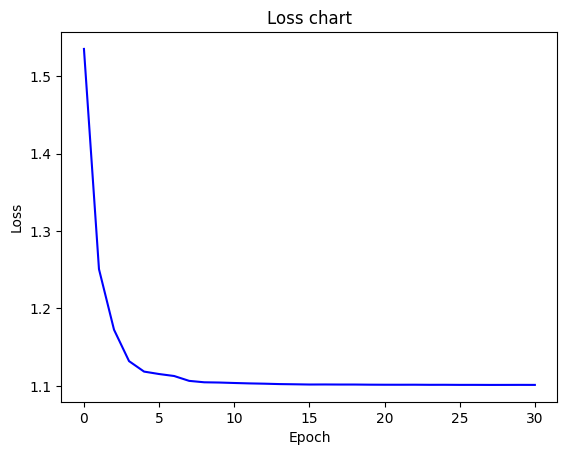

In [8]:
plt.title('Loss chart')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot(MLP.loss_curve_ , color = 'b')

plt.show()

# Validation

البحث عن قيم الباراميترات الأفضل للشبكة العصبونية باستخدام طريقة GridSearch .

و استخدام طريقة التقييم Fold cross validation-5 لتقسيم البيانات

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate_init': [0.001 , 0.01], 'batch_size': [1 , 200]}
grid_search = GridSearchCV(estimator=MLP, param_grid= param_grid , cv=5, verbose=3).fit(X_train, y_train)

عرض قيم الباراميترات الأفضل وعرض دقتها وفقا لعملية البحث ثم اعادة تدريب الشبكة على هذه القيم و عرض دقتها النهائية وعرض مخطط دقتها في كل طور.

In [ ]:
print("Best of Hyper Parameter :" , grid_search.best_params_, "\nScore : " , grid_search.best_score_ , "\nBest estimator : :", grid_search.best_estimator_)

In [ ]:
MLP2 = grid_search.best_estimator_.fit(X_train,y_train)
print("Test score: {:.2f}".format(MLP2.score(X_test, y_test)))

In [ ]:
plt.title('Loss chart')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(MLP2.loss_curve_,color='r',label='MLP')
plt.legend(loc='upper right')
plt.show()

تقييم النموذج الأفضل وفقا للمقاييس: ,matrix confusion
.classification report

matrix confusion

In [ ]:
from sklearn.metrics import confusion_matrix

ypred = MLP2.predict(X_test)
cm = confusion_matrix(y_test, ypred)

print("confusion_matrix(ytest, ypred): \n", cm)

In [ ]:
classes = ['type 1', 'type 2']
cm = cm/np.sum(cm,axis=0)
tick_marks = np.arange(2)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Dark2)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                       ha="center", va="center", color="w")
plt.title('Normalized confusion matrix')
fig.colorbar(im)
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes);

classification report

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, ypred))
print("Recall:", recall_score(y_test, ypred))
print("F1-Score:", f1_score(y_test, ypred))

In [ ]:
print("Classification Report:\n", classification_report(y_test, ypred))